In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import cv2
import glob
# example of zoom image augmentation
from numpy import expand_dims
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot
### from imblearn.under_sampling import RandomUnderSampler
from tensorflow.keras.utils import to_categorical
# define undersample strategy
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')
import tensorflow
tensorflow.compat.v1.logging.set_verbosity(tensorflow.compat.v1.logging.ERROR)
import timeit
import tracemalloc
from tensorflow.keras.utils import to_categorica
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve, precision_recall_curve
import math
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import tensorflow.keras as keras
from tensorflow.keras.layers import Input, Flatten, Dropout, Dense, Conv2D, MaxPooling2D, MaxPool2D
from tensorflow.keras.applications import EfficientNetB0, ResNet50V2

In [2]:
lr=0.3

In [3]:
# Replace to the right path if you clone this git to your computer
main_path = "..\chest_xray"

In [4]:
train_path = os.path.join(main_path,"train")
test_path=os.path.join(main_path,"test")
val_path=os.path.join(main_path,"val")

In [5]:
pneumonia_train_images = glob.glob(train_path+"\\PNEUMONIA\\*.jpeg")
normal_train_images = glob.glob(train_path+"\\NORMAL\\*.jpeg")

In [6]:
pneumonia_test_images = glob.glob(test_path+"\\PNEUMONIA\\*.jpeg")
normal_test_images = glob.glob(test_path+"\\NORMAL\\*.jpeg")

In [7]:
pneumonia_val_images = glob.glob(val_path+"\\PNEUMONIA\\*.jpeg")
normal_val_images = glob.glob(val_path+"\\NORMAL\\*.jpeg")

In [8]:
print(len(normal_train_images))
print(len(pneumonia_train_images))

1341

In [10]:
data = pd.DataFrame(np.concatenate([[0]*len(normal_train_images) , [1] *  len(pneumonia_train_images)]),columns=["class"])

C:\Users\Khanh\Anaconda3\envs\TG24_GPU_ComputerVision\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='class', ylabel='count'>

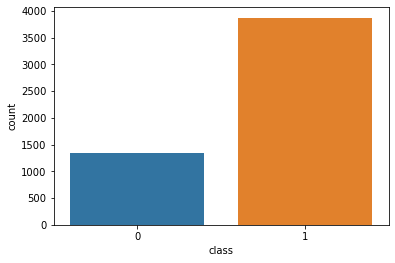

In [11]:
sns.countplot(data['class'],data=data)

# Defining Image Generators

## Load image into array

In [12]:
Normal_train=[]
pneumonia_trian =[]

In [13]:
import cv2
from tqdm import tqdm
for dirs in tqdm(normal_train_images):
    img = cv2.imread(dirs)    
    img2gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    resized = cv2.resize(img2gray, (200,200))
    #print(resized.shape)
    Normal_train.append(np.array(resized))

100%|██████████| 1341/1341 [00:30<00:00, 44.06it/s]


In [14]:
import cv2
from tqdm import tqdm
for dirs in tqdm(pneumonia_train_images):
    img = cv2.imread(dirs)    
    img2gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    resized = cv2.resize(img2gray, (200,200))
    #print(resized.shape)
    pneumonia_trian.append(np.array(resized))

100%|██████████| 3875/3875 [00:29<00:00, 129.23it/s]


In [15]:
## Generating

In [16]:
Normal_train_array=[]

In [17]:
for i in tqdm(range(0,len(Normal_train))):
    #print(a.shape)
    #print(Normal_train[i].shape)
    Normal_train_array.append(Normal_train[i])

100%|██████████| 1341/1341 [00:00<?, ?it/s]


In [18]:
ind = 0
from tqdm import tqdm
for dirs in tqdm(normal_train_images):
    ind=ind+1
    img = cv2.imread(dirs) 
    data = img_to_array(img)
    samples = expand_dims(data, 0)
    
    if ind%2 ==0:
        continue
    else:
        datagen = ImageDataGenerator(zoom_range=[0.8,1.0])
        it = datagen.flow(samples, batch_size=1)
        for i in range(2):
            batch = it.next()
            image = batch[0].astype('uint8')
            resized = cv2.resize(image, (200,200))
            img2gray = cv2.cvtColor(resized, cv2.COLOR_RGB2GRAY)
            Normal_train_array.append(img2gray)

100%|██████████| 1341/1341 [07:13<00:00,  3.09it/s]


In [19]:
Normal_train_array_X = np.array(Normal_train_array)

In [20]:
Normal_train_array_y = [0]*len(Normal_train_array_X)

In [21]:
len(Normal_train_array_y)

2683

In [22]:
pneumonia_trian_array_X = np.array(pneumonia_trian)
pneumonia_train_array_y = [1]*len(pneumonia_trian_array_X)

In [24]:
X_train = np.concatenate((Normal_train_array_X, pneumonia_trian_array_X), axis=0)
y_train = np.concatenate((np.array(Normal_train_array_y), np.array(pneumonia_train_array_y)), axis=0)

### Read testing Image

In [28]:
Normal_test=[]
pneumonia_test =[]
Normal_test_array=[]

In [29]:
import cv2
from tqdm import tqdm
for dirs in tqdm(normal_test_images):
    img = cv2.imread(dirs)    
    img2gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    resized = cv2.resize(img2gray, (200,200))
    #print(resized.shape)
    Normal_test.append(np.array(resized))

100%|██████████| 234/234 [00:04<00:00, 58.15it/s]


In [30]:
import cv2
from tqdm import tqdm
for dirs in tqdm(pneumonia_test_images):
    img = cv2.imread(dirs)    
    img2gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    resized = cv2.resize(img2gray, (200,200))
    #print(resized.shape)
    pneumonia_test.append(np.array(resized))

100%|██████████| 390/390 [00:02<00:00, 145.29it/s]


In [31]:
for i in tqdm(range(0,len(Normal_test))):
    #print(a.shape)
    #print(Normal_train[i].shape)
    Normal_test_array.append(Normal_test[i])

100%|██████████| 234/234 [00:00<?, ?it/s]


In [32]:
Normal_test_array_X = np.array(Normal_test_array)
Normal_test_array_y = [0]*len(Normal_test_array_X)

In [34]:
pneumonia_test_array_X = np.array(pneumonia_test)
pneumonia_test_array_y = [1]*len(pneumonia_test_array_X)

In [36]:
X_test = np.concatenate((Normal_test_array_X, pneumonia_test_array_X), axis=0)
y_test = np.concatenate((np.array(Normal_test_array_y), np.array(pneumonia_test_array_y)), axis=0)

### Defining the model

In [40]:
def Res_model(X, y, index, epoch):
    

    X = X.reshape(X.shape[0],X.shape[1], X.shape[2], 1)
    
    model = ResNet50V2(include_top=False, weights=None, input_tensor=Input(shape=((X.shape[1], X.shape[2], 1))))
    
    x = model.output
    x = Flatten()(x)
    x = Dense(64, activation = 'tanh')(x)
    x = Dense(1, activation = "linear")(x)
    model = keras.Model(model.input, x)
    
    
    model.compile(loss='mse', optimizer='adam')
    model.fit(X, y, epochs=epoch, batch_size=130, verbose = 1)
    model.save('DL_model/model_'+str(index)+'.h5')
    return model.predict(X)

In [41]:
def conf_matrix(y_real, y_predict):
    tn, fp, fn, tp = confusion_matrix(y_real, y_predict).ravel()
    acc= (tp + tn)/(tp+tn+fp+fn)
    pre= tp/(tp+fp)
    Recall=  (tp)/(tp+fn)
    spec= (tn)/(tn+fp)
    F1score= (2*(tp)/(2*tp+fp+fn))
    mcc= ((tp*tn)-(fp*fn))/math.sqrt((tp+fp)*(tp+fn)*(tn+fp)*(tn+fn))
    return tn, fp, fn, tp, acc, pre, Recall, spec, F1score, mcc

In [42]:
# It can be used to reconstruct the model identically.
from tensorflow.keras.models import load_model

def model_Predict(X,n_members):
    X = X.reshape(X.shape[0],X.shape[1], X.shape[2], 1)
    result = np.array([0.5] * len(X))
    for i in range(0, n_members):
        model = load_model('DL_model/model_'+str(i)+".h5")
        RM_predicted = model.predict(X)
        result = result+lr*RM_predicted.reshape((len(X), ))
    return result

# Starting Fitting

In [ ]:
max_auc = 0.9
for num_Interation in range(2, 50, 3):
    rsFile = "Result_OverIteration_Bagging_Numeric/NumberOfBag_"+str(num_Interation)+".csv"
    f2=open(rsFile,"w")
    f2.write('num_Interation, epoch, Time_train, Train_Peak_RAM, Time_predict, Peak_Time_prediction, thres, tn, fp, fn, tp, acc, pre, Recall, spec, F1score, mcc, auc\n')
    for epoch in (10, 50, 100, 500):
        
    
        print("working on num_Interation: " + str(num_Interation) + "_with_epoch_"+str(epoch))
        
        Res = []
        predicted_Base =  np.array([0.5] * len(X_train))
        predicted = predicted_Base
        
        start = timeit.default_timer()
        tracemalloc.start()

        ## Start training
        for i in range(0, num_Interation):
            Res = y_train-predicted
            Predicted_Res = Res_model(X_train,Res, i, epoch)
            New_predicted = predicted+ lr*Predicted_Res.reshape((Predicted_Res.shape[0],))
            predicted = New_predicted

        current, peak = tracemalloc.get_traced_memory()
        stop = timeit.default_timer()
        Time_train=stop - start
        Train_Peak_RAM = peak / 10**6
        
        start = timeit.default_timer()
        tracemalloc.start()
        
        predicted_test = model_Predict(X_test, num_Interation)
        
        stop = timeit.default_timer()
        Time_predict=stop - start
        current, peak = tracemalloc.get_traced_memory()
        Peak_Time_prediction = peak / 10**6
        auc=roc_auc_score(y_test, predicted_test)
        

        thres = predicted_test.min()
        while (thres <= predicted_test.max()):
            thres = thres+(predicted_test.max()/500)
            yhat = []
            for i in range(len(predicted_test)):
                if predicted_test[i]>thres:
                    yhat.append(1)
                else:
                    yhat.append(0)

            yhat = np.array(yhat)

            tn, fp, fn, tp, acc, pre, Recall, spec, F1score, mcc = conf_matrix(y_test, yhat)
            f2.write(str(num_Interation)+", "+str(epoch)+", "+str(Time_train)+", "+str(Train_Peak_RAM)+", "+str(Time_predict)+", "+str(Peak_Time_prediction)+", "+str(thres)+", "+str(tn)+", "+str(fp)+", "+str(fn)+", "+str(tp)+", "+str(acc)+", "+str(pre)+", "+str(Recall)+", "+str(spec)+", "+str(F1score)+", "+str(mcc)+", "+str(auc)+"\n")


    f2.close()
    print('WRITING FILE SUCESSFULL ========!!!!!!!!!!!!!!!!!!!!!!')       